In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
health = pd.read_csv("/content/healthcare_dataset.csv")
health

Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1            2019-08-20   Samantha Davies                       Kim Inc   
2            2022-09-22  Tiffany Mitchell                      Cook PLC   
3            2020-11-18       Kevin Wells    Hernandez Rogers and Vang,   
4            2022-09-19    Kathleen Hanna                   White-White   
...                 ...               ...                           ...   
55495        2020-08-16     Joshua Jarvis                Jones-Thompson   
55496        2020-01-23   Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25    Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02     Dennis Warren                Henry Sons and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
0             Blue Cross    18856.281306          328         Urgent   
1               Medicare    33643.327287          265      Emergency   
2                  Aetna    27955.096079          205      Emergency   
3               Medicare    37909.782410          450       Elective   
4                  Aetna    14238.317814          458         Urgent   
...                  ...             ...          ...            ...   
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      Discharge Date   Medication  Test Results  
0         2024-02-02  Paracetamol        Normal  
1         2019-08-26    Ibuprofen  Inconclusive  
2         2022-10-07      Aspirin        Normal  
3         2020-12-18    Ibuprofen      Abnormal  
4         2022-10-09   Penicillin      Abnormal  
...              ...          ...           ...  
55495     2020-09-15   Penicillin      Abnormal  
55496     2020-02-01      Aspirin        Normal  
55497     2020-08-10    Ibuprofen      Abnormal  
55498     2019-05-31    Ibuprofen      Abnormal  
55499     2024-04-29    Ibuprofen      Abnormal  

[55500 rows x 15 columns]

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
health['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [ ]:
health.Name

0            Bobby JacksOn
1             LesLie TErRy
2              DaNnY sMitH
3             andrEw waTtS
4            adrIENNE bEll
               ...        
55495    eLIZABeTH jaCkSOn
55496           KYle pEREz
55497         HEATher WaNG
55498       JENniFER JOneS
55499         jAMES GARCiA
Name: Name, Length: 55500, dtype: object

In [ ]:
health['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

<Axes: >

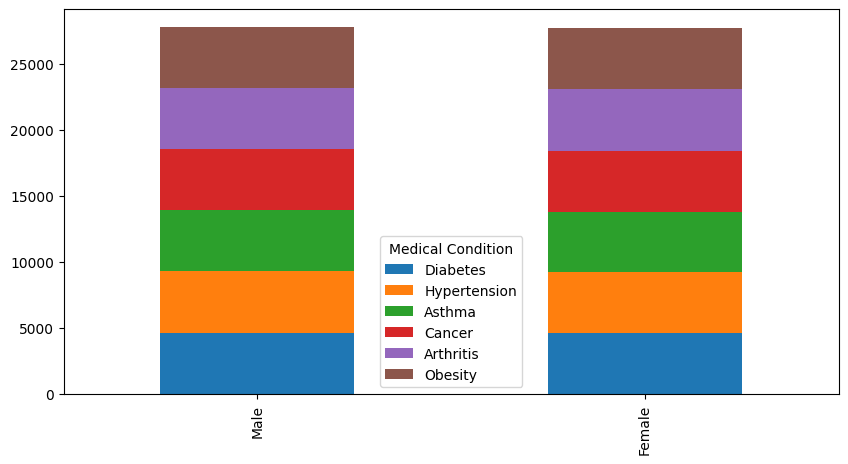

In [ ]:
Male=health[health['Gender']=='Male']['Medical Condition'].value_counts()
Female=health[health['Gender']=='Female']['Medical Condition'].value_counts()
df=pd.DataFrame([Male,Female])
df.index=['Male','Female']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [ ]:
health['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

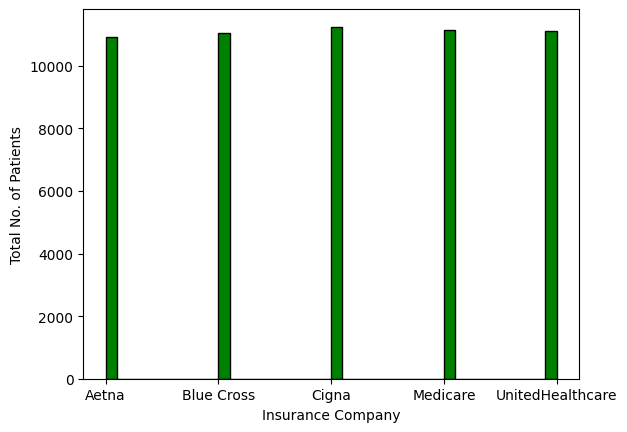

In [ ]:
data=health['Insurance Provider'].sort_values()
plt.hist(data,bins=40,color='green',edgecolor='black',rwidth=3)
plt.xlabel('Insurance Company')
plt.ylabel('Total No. of Patients')
plt.show()

In [ ]:
health['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [ ]:
mapping={'Emergency':0,'Urgent':1,'Elective':2}

health['Admission Type']=health['Admission Type'].map(mapping)

In [ ]:
health.head(10)

Name  Age  Gender Blood Type Medical Condition  \
0       Bobby JacksOn   30    Male         B-            Cancer   
1        LesLie TErRy   62    Male         A+           Obesity   
2         DaNnY sMitH   76  Female         A-           Obesity   
3        andrEw waTtS   28  Female         O+          Diabetes   
4       adrIENNE bEll   43  Female        AB+            Cancer   
5       EMILY JOHNSOn   36    Male         A+            Asthma   
6      edwArD EDWaRDs   21  Female        AB-          Diabetes   
7  CHrisTInA MARtinez   20  Female         A+            Cancer   
8     JASmINe aGuIlaR   82    Male        AB+            Asthma   
9    ChRISTopher BerG   58  Female        AB-            Cancer   

  Date of Admission            Doctor                     Hospital  \
0        2024-01-31     Matthew Smith              Sons and Miller   
1        2019-08-20   Samantha Davies                      Kim Inc   
2        2022-09-22  Tiffany Mitchell                     Cook PLC   
3        2020-11-18       Kevin Wells   Hernandez Rogers and Vang,   
4        2022-09-19    Kathleen Hanna                  White-White   
5        2023-12-20     Taylor Newton               Nunez-Humphrey   
6        2020-11-03       Kelly Olson              Group Middleton   
7        2021-12-28    Suzanne Thomas  Powell Robinson and Valdez,   
8        2020-07-01   Daniel Ferguson                Sons Rich and   
9        2021-05-23       Heather Day               Padilla-Walker   

  Insurance Provider  Billing Amount  Room Number  Admission Type  \
0         Blue Cross    18856.281306          328               1   
1           Medicare    33643.327287          265               0   
2              Aetna    27955.096079          205               0   
3           Medicare    37909.782410          450               2   
4              Aetna    14238.317814          458               1   
5   UnitedHealthcare    48145.110951          389               1   
6           Medicare    19580.872345          389               0   
7              Cigna    45820.462722          277               0   
8              Cigna    50119.222792          316               2   
9   UnitedHealthcare    19784.631062          249               2   

  Discharge Date   Medication  Test Results  
0     2024-02-02  Paracetamol        Normal  
1     2019-08-26    Ibuprofen  Inconclusive  
2     2022-10-07      Aspirin        Normal  
3     2020-12-18    Ibuprofen      Abnormal  
4     2022-10-09   Penicillin      Abnormal  
5     2023-12-24    Ibuprofen        Normal  
6     2020-11-15  Paracetamol  Inconclusive  
7     2022-01-07  Paracetamol  Inconclusive  
8     2020-07-14      Aspirin      Abnormal  
9     2021-06-22  Paracetamol  Inconclusive

In [ ]:
health['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

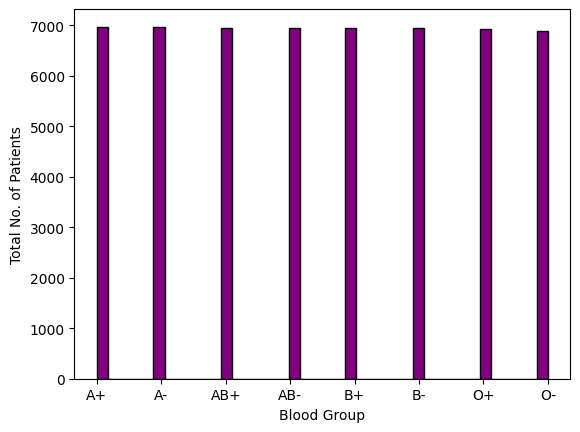

In [ ]:
data=health['Blood Type'].sort_values()
plt.hist(data,bins=40,color='purple',edgecolor='black',rwidth=1.5)
plt.xlabel('Blood Group')
plt.ylabel('Total No. of Patients')
plt.show()

<Axes: >

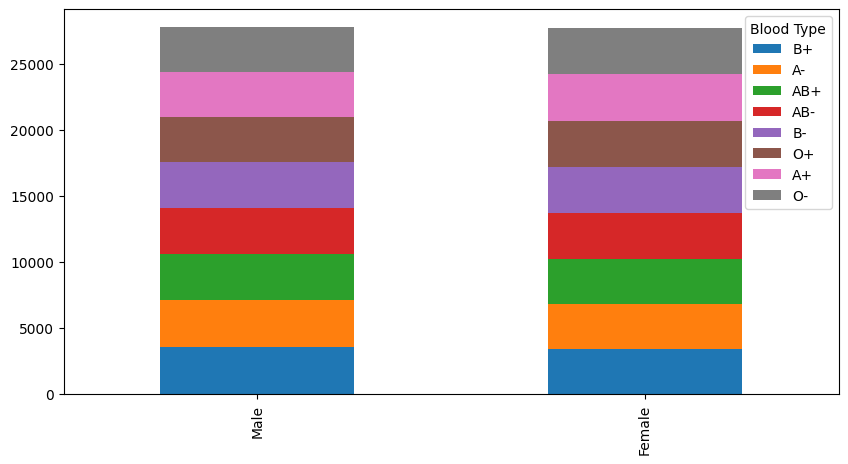

In [ ]:
Male=health[health['Gender']=='Male']['Blood Type'].value_counts()
Female=health[health['Gender']=='Female']['Blood Type'].value_counts()
df=pd.DataFrame([Male,Female])
df.index=['Male','Female']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [ ]:
health.Medication.value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

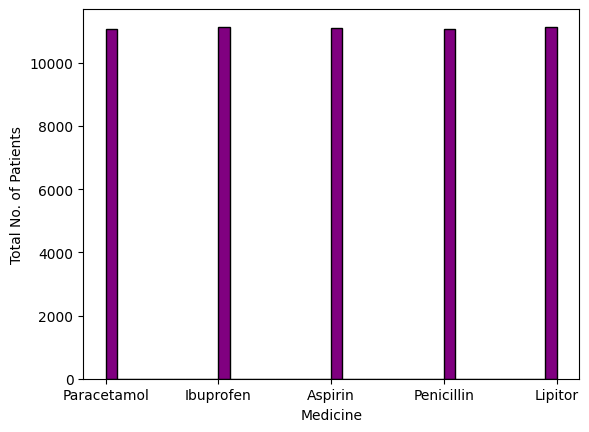

In [ ]:
data=health['Medication']
plt.hist(data,bins=40,color='purple',edgecolor='black',rwidth=1.5)
plt.xlabel('Medicine')
plt.ylabel('Total No. of Patients')
plt.show()

<Axes: >

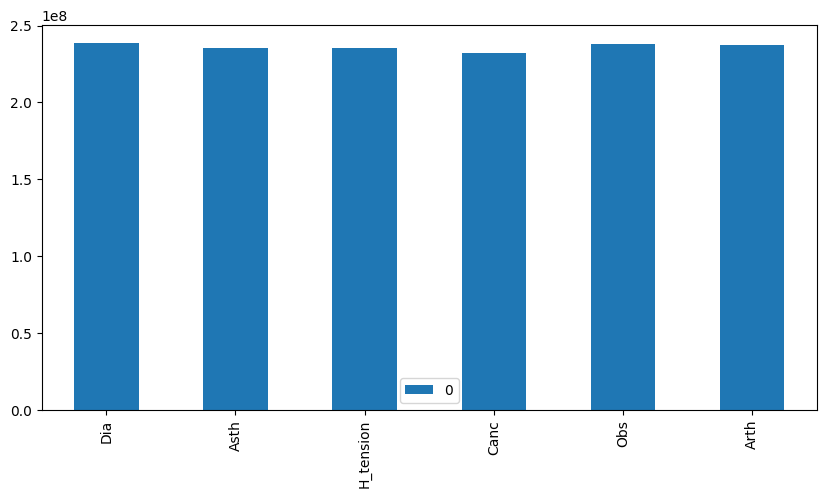

In [ ]:
Dia=health[health['Medical Condition']=='Diabetes']['Billing Amount'].sum()
Asth=health[health['Medical Condition']=='Asthma']['Billing Amount'].sum()
H_tension=health[health['Medical Condition']=='Hypertension']['Billing Amount'].sum()
Canc=health[health['Medical Condition']=='Cancer']['Billing Amount'].sum()
Obs=health[health['Medical Condition']=='Obesity']['Billing Amount'].sum()
Arth=health[health['Medical Condition']=='Arthritis']['Billing Amount'].sum()

df=pd.DataFrame([Dia,Asth,H_tension,Canc,Obs,Arth])
df.index=['Dia','Asth','H_tension','Canc','Obs','Arth']
df.plot(kind='bar',figsize=(10,5))

In [ ]:
import seaborn as sns

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  int64  
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 6.4

<Axes: >

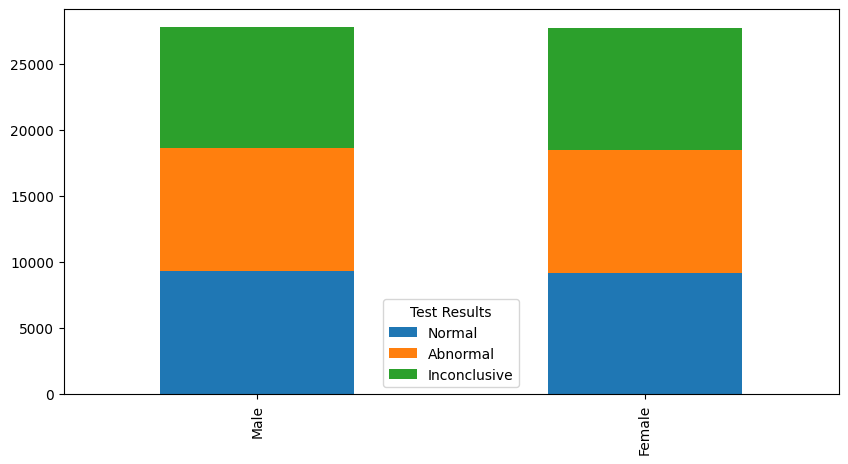

In [ ]:
Male=health[health['Gender']=='Male']['Test Results'].value_counts()
Female=health[health['Gender']=='Female']['Test Results'].value_counts()
df=pd.DataFrame([Male,Female])
df.index=['Male','Female']
df.plot(kind='bar',stacked=True,figsize=(10,5))

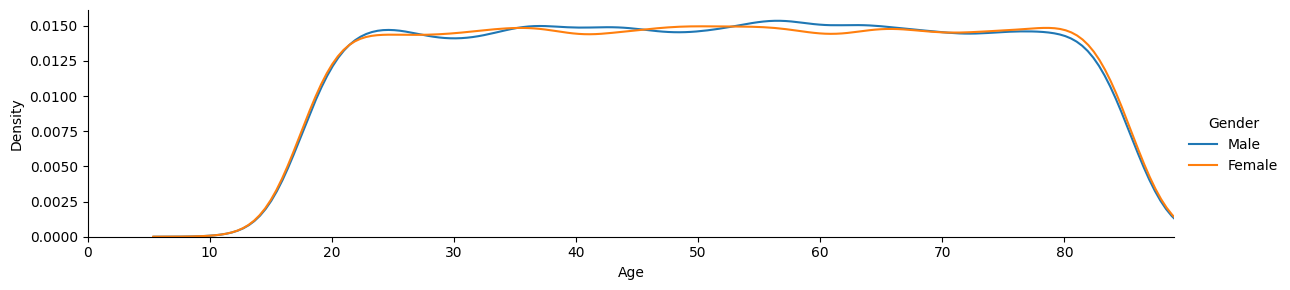

In [ ]:
facet=sns.FacetGrid(health, hue='Gender', aspect=4)
facet.map(sns.kdeplot,'Age')
facet.set(xlim=(0, health['Age'].max()))
facet.add_legend()
plt.show()

In [ ]:
health['Name'][2].upper()

'DANNY SMITH'

In [ ]:
health['Name']=health['Name'].str.upper()

In [ ]:
health.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  BOBBY JACKSON   30    Male         B-            Cancer        2024-01-31   
1   LESLIE TERRY   62    Male         A+           Obesity        2019-08-20   
2    DANNY SMITH   76  Female         A-           Obesity        2022-09-22   
3   ANDREW WATTS   28  Female         O+          Diabetes        2020-11-18   
4  ADRIENNE BELL   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number  Admission Type Discharge Date   Medication  \
0    18856.281306          328               1     2024-02-02  Paracetamol   
1    33643.327287          265               0     2019-08-26    Ibuprofen   
2    27955.096079          205               0     2022-10-07      Aspirin   
3    37909.782410          450               2     2020-12-18    Ibuprofen   
4    14238.317814          458               1     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

<Axes: >

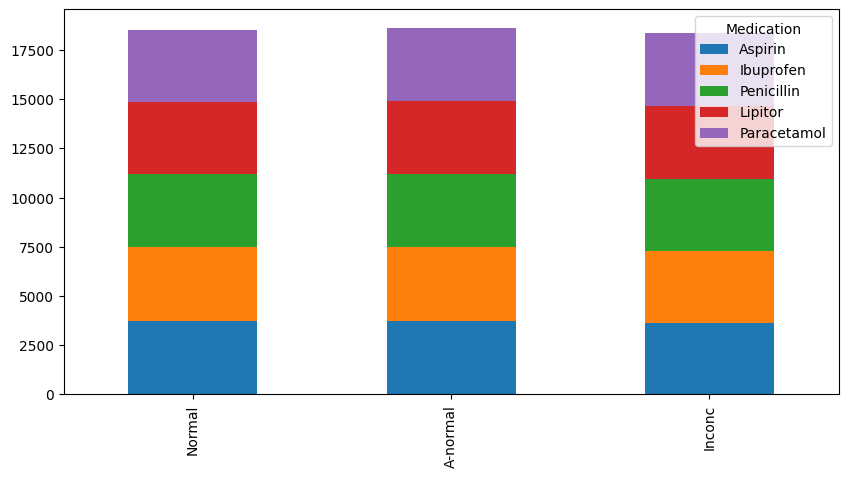

In [ ]:
Normal=health[health['Test Results']=='Normal']['Medication'].value_counts()
Anormal=health[health['Test Results']=='Abnormal']['Medication'].value_counts()
Inconc=health[health['Test Results']=='Inconclusive']['Medication'].value_counts()
ks=pd.DataFrame([Normal,Anormal,Inconc])
ks.index=['Normal','A-normal','Inconc']
ks.plot(kind='bar',stacked=True,figsize=(10,5))

In [ ]:
lr1=['Age','Gender']
health[lr1]

Age  Gender
0       30    Male
1       62    Male
2       76  Female
3       28  Female
4       43  Female
...    ...     ...
55495   42  Female
55496   61  Female
55497   38  Female
55498   43    Male
55499   53  Female

[55500 rows x 2 columns]

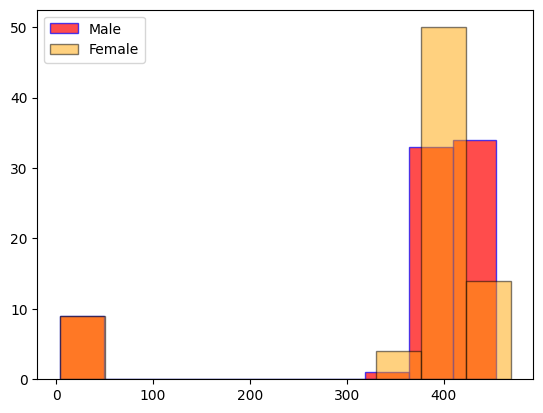

In [ ]:
g1=health[health['Gender']=='Male']['Age'].value_counts()
g2=health[health['Gender']=='Female']['Age'].value_counts()
plt.hist(g1, label='Male', alpha=.7, edgecolor='blue',color='red')
plt.hist(g2, label='Female', alpha=.5, edgecolor='black',color='orange')
plt.legend()
plt.show()

In [ ]:
map2={'Normal':0, 'Abnormal':1, 'Inconclusive':-1}

health['Test Results']=health['Test Results'].map(map2)

In [ ]:
health.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  BOBBY JACKSON   30    Male         B-            Cancer        2024-01-31   
1   LESLIE TERRY   62    Male         A+           Obesity        2019-08-20   
2    DANNY SMITH   76  Female         A-           Obesity        2022-09-22   
3   ANDREW WATTS   28  Female         O+          Diabetes        2020-11-18   
4  ADRIENNE BELL   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number  Admission Type Discharge Date   Medication  \
0    18856.281306          328               1     2024-02-02  Paracetamol   
1    33643.327287          265               0     2019-08-26    Ibuprofen   
2    27955.096079          205               0     2022-10-07      Aspirin   
3    37909.782410          450               2     2020-12-18    Ibuprofen   
4    14238.317814          458               1     2022-10-09   Penicillin   

   Test Results  
0             0  
1            -1  
2             0  
3             1  
4             1

In [ ]:
date=health['Date of Admission'][1]
date

'2019-08-20'

In [ ]:
date=date[:4]
date

'2019'

In [ ]:
health.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  BOBBY JACKSON   30    Male         B-            Cancer        2024-01-31   
1   LESLIE TERRY   62    Male         A+           Obesity        2019-08-20   
2    DANNY SMITH   76  Female         A-           Obesity        2022-09-22   
3   ANDREW WATTS   28  Female         O+          Diabetes        2020-11-18   
4  ADRIENNE BELL   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number  Admission Type Discharge Date   Medication  \
0    18856.281306          328               1     2024-02-02  Paracetamol   
1    33643.327287          265               0     2019-08-26    Ibuprofen   
2    27955.096079          205               0     2022-10-07      Aspirin   
3    37909.782410          450               2     2020-12-18    Ibuprofen   
4    14238.317814          458               1     2022-10-09   Penicillin   

   Test Results  
0             0  
1            -1  
2             0  
3             1  
4             1

In [ ]:
health['Year of Admission']=pd.DatetimeIndex(health['Date of Admission']).year

In [ ]:
health.head(10)

Name  Age  Gender Blood Type Medical Condition  \
0       BOBBY JACKSON   30    Male         B-            Cancer   
1        LESLIE TERRY   62    Male         A+           Obesity   
2         DANNY SMITH   76  Female         A-           Obesity   
3        ANDREW WATTS   28  Female         O+          Diabetes   
4       ADRIENNE BELL   43  Female        AB+            Cancer   
5       EMILY JOHNSON   36    Male         A+            Asthma   
6      EDWARD EDWARDS   21  Female        AB-          Diabetes   
7  CHRISTINA MARTINEZ   20  Female         A+            Cancer   
8     JASMINE AGUILAR   82    Male        AB+            Asthma   
9    CHRISTOPHER BERG   58  Female        AB-            Cancer   

  Date of Admission            Doctor                     Hospital  \
0        2024-01-31     Matthew Smith              Sons and Miller   
1        2019-08-20   Samantha Davies                      Kim Inc   
2        2022-09-22  Tiffany Mitchell                     Cook PLC   
3        2020-11-18       Kevin Wells   Hernandez Rogers and Vang,   
4        2022-09-19    Kathleen Hanna                  White-White   
5        2023-12-20     Taylor Newton               Nunez-Humphrey   
6        2020-11-03       Kelly Olson              Group Middleton   
7        2021-12-28    Suzanne Thomas  Powell Robinson and Valdez,   
8        2020-07-01   Daniel Ferguson                Sons Rich and   
9        2021-05-23       Heather Day               Padilla-Walker   

  Insurance Provider  Billing Amount  Room Number  Admission Type  \
0         Blue Cross    18856.281306          328               1   
1           Medicare    33643.327287          265               0   
2              Aetna    27955.096079          205               0   
3           Medicare    37909.782410          450               2   
4              Aetna    14238.317814          458               1   
5   UnitedHealthcare    48145.110951          389               1   
6           Medicare    19580.872345          389               0   
7              Cigna    45820.462722          277               0   
8              Cigna    50119.222792          316               2   
9   UnitedHealthcare    19784.631062          249               2   

  Discharge Date   Medication  Test Results  Year of Admission  
0     2024-02-02  Paracetamol             0               2024  
1     2019-08-26    Ibuprofen            -1               2019  
2     2022-10-07      Aspirin             0               2022  
3     2020-12-18    Ibuprofen             1               2020  
4     2022-10-09   Penicillin             1               2022  
5     2023-12-24    Ibuprofen             0               2023  
6     2020-11-15  Paracetamol            -1               2020  
7     2022-01-07  Paracetamol            -1               2021  
8     2020-07-14      Aspirin             1               2020  
9     2021-06-22  Paracetamol            -1               2021

In [ ]:
health['Year of Admission'].value_counts()

Year of Admission
2020    11285
2023    11026
2022    11017
2021    10931
2019     7387
2024     3854
Name: count, dtype: int64

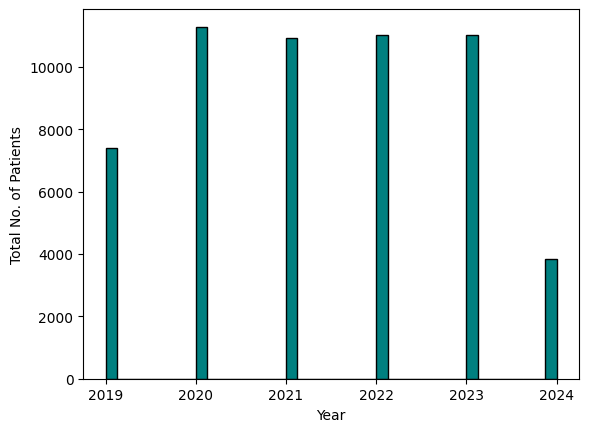

In [ ]:
data=health['Year of Admission'].sort_values()
plt.hist(data,bins=40,color='teal',edgecolor='black',rwidth=1.5)
plt.xlabel('Year')
plt.ylabel('Total No. of Patients')
plt.show()

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  int64  
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  int64  
 15  Year of Admission   55500 non-null  int32  
dtypes: f

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X=health.drop(["Name","Test Results","Gender","Blood Type","Medical Condition","Date of Admission","Doctor","Hospital","Insurance Provider","Discharge Date","Medication"],axis=1).values
y=health['Test Results'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.predict(X_test)

array([ 1, -1,  0, ...,  0, -1,  1])

In [ ]:
knn.score(X_train,y_train)*100

54.436936936936945